# Import Libraries


In [1]:
import pandas as pd
import numpy as np
import re             #regular expressions
import seaborn as sns #data visualization
import numpy as np    #array processing
import matplotlib.pyplot as plt  #data visualization
from bs4 import BeautifulSoup    #handling HTML 
from collections import Counter  #container datatypes
#from wordcloud import WordCloud  #data visualization
from nltk.corpus import stopwords# Natural Language toolkit
from sklearn.feature_extraction.text import TfidfTransformer #TF-IDF
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier 
from imblearn.over_sampling import SMOTE     #Oversampling
from imblearn.pipeline import make_pipeline  #Pipeline is just an abstract notion for performing sequence of different transformations
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV, StratifiedKFold
from nltk.stem import WordNetLemmatizer      #Lemmatization
from nltk.tokenize import WordPunctTokenizer #Tokenizer
import nltk
#nltk.download('all') 

import warnings

pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

C:\Users\Shankar\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


# Data 


In [0]:
path = '/content/gdrive/My Drive/GS Quantify/'

In [2]:

train = [line.strip() for line in open(path+"train_set.txt", "r").readlines()]
train = [{"LineNumber": line.split("~")[0], "Text": line.split("~")[1]} for line in train]
train = pd.DataFrame(train)
train.head()

,LineNumber,Text
0,L0,gs.api.log.57_13-09-2019_06:59 34703 INFO gs.openstack.wsgi.server [ req-y9mjwk-n1yj-6wl35r-nhwlbg ] HTTP exception thrown: No entry found for any event
1,L1,gs.compute.log.30_2019-09-12_07:04:00 39946 INFO gs.openapi.server [ req-0fpkx-6purm-vpog-enwlc-a32lk ] Creating event network-vif-plugged: for instance
2,L2,gs.compute.log.77_2019-09-11_10:53:00 94359 INFO gs.api.openstack.compute.wsgi [ req-ufxz-lctxos-ogc53-l89bg ] Creating event network-vif-plugged: for instance
3,L3,gs.compute.log.38_2019-09-01_13:31:00 80828 INFO gs.resource.claims [ req-j1yt-0n37-nji3-xkf8 ] Creating event network-vif-plugged: for instance
4,L4,"gs.api.log.38_Sep 01, 2019_13:20:00 44944 INFO gs.resource.claims [ req-fcvp-2m85w-bdsu2p-voi178 ] ""DELETE /v2/lw7jq0tyfi3n1pxu/servers/details HTTP/1.1"" status: 204 len: 2713 time: 0.1205121"


In [6]:
test = [line.strip() for line in open(path+"public_test_set.txt", "r").readlines()]
test = [{"LineNumber": line.split("~")[0], "Text": line.split("~")[1]} for line in test]
test = pd.DataFrame(test)
test.head()

,LineNumber,Text
0,L0,"gs.api.log.69_Sep 14, 2019_13:20:00 58233 INFO gs.openapi.server [ req-qvrlz-kqijyd-easb2-l89bg-460fp ] [ instance: rq1a-vla0s-57sy1o ] vcpu limit not specified, default to unlimited"
1,L1,gs.compute.log.56.10-09-2019_04:18 PM 60109 INFO gs.openstack.server [ req-n7w9u-tn296-gmw3 ] [ instance: jlb62-8vpj-a8eyko-znf6p1 ] Took 3049 seconds to spawn the instance on the hypervisor
2,L2,gs.api.log.84_11-09-2019_09:30 80226 INFO gs.compute.manager [ req-6od5mc-e6ba-xd16 ] HTTP exception thrown: No instances found for any event
3,L3,"gs.compute.log.94.Sep 07, 2019_13:04 57889 INFO gs.openstack.server [ req-kyum-oi5g-w4q2-e8uxd ] ""GET /v2/2019-09-14 vendor_data.json HTTP/1.1"" status: 404 len: 7393 time: 0.1665167"
4,L4,"gs.api.log.40_Sep 11, 2019_23:18:00 61822 INFO gs.api.openapi.compute.wsgi [ req-y9mjwk-6do12x-5eva8-gqds-64ugji ] [ instance: y5tj-ufwp-34nme6-6do12x ] Total memory limit not specified, defaultin..."


In [7]:
final = [line.strip() for line in open(path+"private_test_set.txt", "r").readlines()]
final = [{"LineNumber": line.split("~")[0], "Text": line.split("~")[1]} for line in final]
final = pd.DataFrame(final)
final.head()

,LineNumber,Text
0,L0,"gs.api.log.60.Sep 09, 2019_10:45 17162 INFO gs.resource.resource_tracker [ req-vleiy-st19-07b8k3-h4bjn-r60qt4 ] Active base files: /var/lib/gs/instances/_base/vleiy-st19-07b8k3-h4bjn-r60qt4"
1,L1,gs.api.log.14.2019-09-02_07:57 AM 60858 INFO gs.resource.manager [ req-vz2nx-rj0zcy-lem3a-hg2m1-j6zsi ] [ instance: 8ohnb-1gbn-0eyq-1m82u-jvlt ] Instance Destroyed Successfully
2,L2,gs.api.compute.log.65.11-09-2019_04:57 AM 72310 INFO gs.api.openstack.compute.wsgi [ req-seht-hxfm7-znf6p1-f1zgu ] [ instance: 9y6vnd-0n37-x3fz-a7s4-e1ajgn ] VM Resumed (Lifecycle Event)
3,L3,"gs.compute.log.82.07-09-2019_05:17 PM 5534 INFO gs.openapi.server [ req-xms9j-g0zcrh-kd5eu ] ""GET /latest/meta-data/block-device-mapping/ami HTTP/1.1"" status: 200 len: 5204 time: 0.1012101"
4,L4,gs.api.log.15.2019-09-14_16:27 39946 INFO gs.openstack.server [ req-ioxmw-6nub-4yrq2 ] Removing base or swap file: /var/lib/gs/instances/_base/9y6vnd-7vse1y-8qoj-uxnq


# Data Preprocessing


In [3]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shankar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
tok = WordPunctTokenizer()
lemmatizer = WordNetLemmatizer() 

def text_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')                             #decode html
    souped = soup.get_text()                                       #get text
    newString = (souped.encode('ascii', 'ignore')).decode("utf-8") #encode to ascii
    newString=re.sub(r'@[A-Za-z0-9]+','',newString)                #removing user mentions
    letters_only = re.sub("[^a-zA-Z]", " ", newString)             #Fetching out only ascii characters
    lower_case = letters_only.lower()                              #converting everything to lowercase
    words = tok.tokenize(lower_case)                               #tokenize and join together to remove white spaces between words
    long_words=[]
    for i in words:
      if len(i)>2:                                                 #removing short words
        long_words.append(lemmatizer.lemmatize(i))                 #converting words to lemma
    return (" ".join(long_words)).strip()                          #combining to form sentence


In [5]:
cleaned_text = []
for t in train.Text:
    cleaned_text.append(text_cleaner(t))

# cleaned_text_t = []
# for t in test.Text:
#     cleaned_text_t.append(text_cleaner(t))

# cleaned_text_final = []
# for t in final.Text:
#     cleaned_text_final.append(text_cleaner(t))

In [6]:
train['cleaned_text'] = cleaned_text
# test['cleaned_text'] = cleaned_text_t
# final['cleaned_text_final'] = cleaned_text_final

## Vectorization


### Bag of Words


In [0]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
bow = count_vect.fit_transform(train['cleaned_text'].values)
bow_t = count_vect.transform(test['cleaned_text'].values)
bow_final = count_vect.transform(final['cleaned_text_final'].values)

### Term frequency and Inverse document frequency

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(train['cleaned_text'].values)
tfidf_t = tfidf_vect.transform(test['cleaned_text'].values)
tfidf_final = tfidf_vect.transform(final['cleaned_text_final'].values)

# Elbow Method

To find optimal number of cluster from 5 to 20


In [0]:
from sklearn.cluster import KMeans
wcss = []
for i in range(5,20):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(bow)
    #kmeans.fit(tfidf)
    #kmeans.fit(tfidf)
    wcss.append(kmeans.inertia_)


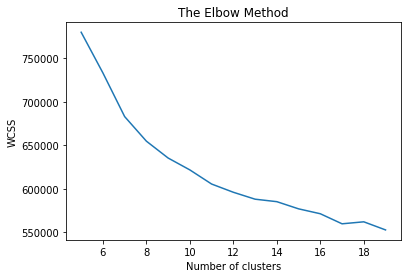

In [18]:
plt.plot(range(5, 20),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')

plt.show()

# Clustering

In [15]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 17,init='k-means++', n_jobs = -1,random_state=99)
#model.fit(bow)
model.fit(tfidf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=17, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=99, tol=0.0001, verbose=0)

In [0]:
labels = model.labels_
cluster_center=model.cluster_centers_

In [0]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(bow, labels, metric='euclidean')

In [45]:
# which tells us that clusters are far away from each other 
silhouette_score #0.15778461601531468 #0.13974297448202713

0.13974297448202713

In [16]:
df = train
#df['Bow Clus Label'] = model.labels_ 
df['Tfidf_Clus_Label_17'] = model.labels_ # the last column you can see the label numebers
df.head(2)

,LineNumber,Text,cleaned_text,Tfidf_Clus_Label_17
0,L0,gs.api.log.57_13-09-2019_06:59 34703 INFO gs.openstack.wsgi.server [ req-y9mjwk-n1yj-6wl35r-nhwlbg ] HTTP exception thrown: No entry found for any event,api log info openstack wsgi server req mjwk nhwlbg http exception thrown entry found for any event,3
1,L1,gs.compute.log.30_2019-09-12_07:04:00 39946 INFO gs.openapi.server [ req-0fpkx-6purm-vpog-enwlc-a32lk ] Creating event network-vif-plugged: for instance,compute log info openapi server req fpkx purm vpog enwlc creating event network vif plugged for instance,1


In [17]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = count_vect.get_feature_names()
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
        print()

Top terms per cluster:
Cluster 0: json
 meta
 data
 get
 status
 len
 time
 http
 compute
 sep
Cluster 1: plugged
 vif
 creating
 network
 for
 event
 compute
 instance
 info
 req
Cluster 2: total
 vgpus
 disk
 allocated
 usable
 compute
 log
 req
 info
 resource
Cluster 3: exception
 found
 any
 thrown
 for
 event
 http
 entry
 api
 req
Cluster 4: latest
 mapping
 device
 block
 meta
 data
 get
 time
 status
 len
Cluster 5: ovjcx
 hxfm
 qri
 ejk
 instance
 api
 compute
 req
 info
 log
Cluster 6: base
 file
 var
 lib
 unknown
 api
 active
 instance
 swap
 sep
Cluster 7: memory
 total
 usable
 allocated
 compute
 info
 req
 log
 resource
 wsgi
Cluster 8: detail
 server
 sep
 len
 time
 status
 http
 api
 delete
 post
Cluster 9: lifecycle
 compute
 event
 api
 instance
 req
 log
 info
 stopped
 started


In [0]:
# for i in range(10):
#     print("A review of assigned to cluster ", i)
#     print("-" * 70)
#     print(df.iloc[df.groupby(['Tfidf_Cluse_Label_17']).groups[i][0]]['Text'])
#     print('\n')
#     print("_" * 70)

# Splitting the data

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(bow, df['Tfidf_Clus_Label_17'],test_size=0.2,random_state=101)

# Model


In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print("Confusion Matrix for K Neighbors Classifier:")
print(confusion_matrix(y_test,predknn))
print("Score: ",round(accuracy_score(y_test,predknn)*100,2))
print("Classification Report:")
print(classification_report(y_test,predknn))

Confusion Matrix for K Neighbors Classifier:
[[ 528    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0 1998    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0  548    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0 2017    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0 1971    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    2    0    5    3   16    3    0    2   11    2    1    4    4
     1    0    2]
 [   0    0    0    0    0    0 1172    0    0    0    0    0    0    0
     0    0   13]
 [   0    0    0    0    0    0    0  284    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    0    0 1665    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    0    0    0 2189    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    0    0    0    0  75

# Prediction


In [0]:
pred = knn.predict(bow_t)
pred_final = knn.predict(bow_final)

In [0]:
s = pd.DataFrame()
s['LineNumber'] = test['LineNumber']
s['Class'] = pred
s['Class'] = s['Class'].map({0:"C1", 1:"C2", 2:'C3', 3:'C4', 4:'C5', 5:"C6", 6:"C7", 7:"C8", 8:"C9", 9:'C10', 10:'C11', 11:'C12', 12:'C13', 13:'C14', 14:'C15',
                             15:'C16', 16:'C17'})
                             #15:'C16', 16:'C17', 17:'C18', 18:'C19', 19:'C20'})

In [0]:
s = pd.DataFrame()
s['LineNumber'] = final['LineNumber']
s['Class'] = pred_final
s['Class'] = s['Class'].map({0:"C1", 1:"C2", 2:'C3', 3:'C4', 4:'C5', 5:"C6", 6:"C7", 7:"C8", 8:"C9", 9:'C10', 10:'C11', 11:'C12', 12:'C13', 13:'C14', 14:'C15'})
                             #15:'C16', 16:'C17', 17:'C18', 18:'C19', 19:'C20'})

In [47]:
s.head()

,LineNumber,Class
0,L0,C11
1,L1,C15
2,L2,C4
3,L3,C12
4,L4,C11


In [0]:
s.to_csv('Knn_public.csv', index = False)

In [0]:
tr = df[['LineNumber', "Tfidf_Clus_Label_17"]]
tr['Class'] = train['Tfidf_Clus_Label_17'].map({0:"C1", 1:"C2", 2:'C3', 3:'C4', 4:'C5', 5:"C6", 6:"C7", 7:"C8", 8:"C9", 9:'C10', 10:'C11', 11:'C12', 12:'C13', 13:'C14', 14:'C15',
                             15:'C16', 16:'C17'})

In [0]:
tr.to_csv("Training_best_cluster.csv", index = False)